# Module 3 - Final Project

# PROJECT GOAL  
The goal of this project is to test your ability to gather information from a real-world database
and use your knowledge of statistical analysis and hypothesis testing to generate analytical
insights that can be meaningful to the company/stakeholder.  

# STATISTICAL ANALYSIS REQUIREMENTS  
For this project, you will need data to perform a statistical analysis. In the statistical analysis,
you'll need to perform hypothesis tests to answer at least three questions from the data source
you choose.  
For each hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis
for your question. Also, describe what statistical test you will use to test the hypothesis.
(independent t-test, dependent t-test, ANOVA etc.).

# The Project

For this project I have used data about the video game industry from Kaggle (Video Game Sales with Ratings
Video game sales from Vgchartz and corresponding ratings from Metacritic by Rush Kirubi https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings), which was gathered from VGCHARTZ (http://www.vgchartz.com/gamedb/) and MetaCritic (https://www.metacritic.com/browse/games/release-date/available) using BeautifulSoup.  
I will ask 3 meaningful questions which will help my stakeholder to have a better understanding of the gaming industry.

# Question 1: In Japan does Nintendo sell better than Xbox?

# Question 2: Are shooter Games in USA sell better than sport games?

# Question 3: Do Users and Critics give similar scores to Playstation Games?

# Inspect given data

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols

# display options
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')
# sns.set_context('poster')

In [53]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.shape)
df.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [55]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Data Cleaning

Check NaN values and deal with them, use integers for certain columns, rename columns, check for duplicates

In [56]:
# prepare to plot missing values
df_missing = df.isna().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.sort_values(by='missing_count')

In [57]:
# create a df cleaned from columns containing more than 50% NaN values
df_missing = (df.isna().sum()/len(df)).reset_index()
df_missing.columns = ['column','proportion']
df_missing = df_missing.sort_values(by = 'proportion')

missingvaluescols = df_missing[df_missing['proportion'] > 0.40].column.tolist()
df_clean = df.drop(missingvaluescols, axis=1)
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [58]:
# check the difference between the original df and the cleaned df 
print(df.shape)
print(df_clean.shape)

(16719, 16)
(16719, 11)


Rename a few columns for a better working flow

In [59]:
# rename columns
# use integer for Year and Global sales columns
df = df.rename(columns={'Year_of_Release': 'Year', 'NA_Sales': 'USA', 'EU_Sales': 'EU', 'JP_Sales': 'JP', 'Other_Sales': 'Other', 'Global_Sales': 'Global'})
df = df[df['Year'].notnull()]
df = df[df['Genre'].notnull()]
df['Year'] = df['Year'].apply(int)
df['Global'] = df['Global'].apply(int)
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN,NaN,NaN,NaN,NaN,NaN


Also I am getting rid of the Developer column, because of the NaN values and because I can use just the Publisher column

In [60]:
# drop 'Developer'
df = df.drop(columns=['Developer'])
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN,NaN,NaN,NaN,NaN


This dataset was released in 2016, and it has dates after 2017 until 2020 indicating the games which will be released at that dates. For a more accurate dataset I'm not using games after 2017 because I don't have relieble data about their actual release.

In [61]:
df = df[df['Year'] <= 2016.0]
# sorted(df.Year.unique())

# Question 1: In Japan does Nintendo sell better than Xbox?

Xbox and Playstation are both very popular gaming platforms, but which one of them is the most popular one?  
In order to anwer this question I will:
- Set up my Hypothesis:  
        h0 ==> no difference in the selling number   
        hA ==> there is a difference (Nintendo sells better)  
- Also I choose my significance level as 0.05  
- I will use a T-test  
- Determine the p-value  
- Accept or reject the Null hypothesis

I decided to use a T-test, because with it I can compare two averages (means) if they are different from each other

At the moment my data has distinct platforms like PS, PS2, XB, Wii, and so on, so I will create a new column which indicates the general platform:

1 --> Playstation : [PS, PS2, PS3, PS4]  
2 --> Xbox : [XB, X360, XOne]  
3 --> PC : [PC]  
4 --> Nintendo : [Wii, WiiU]  
5 --> Portable : [GB, GBA, GC, DS, 3DS, PSP, PSV]  

In [62]:
import library

In [63]:
# creating the Platform Category bins
df['PlatformCategory'] = df.Platform.apply(library.platforms)
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Rating,PlatformCategory
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,76.0,51.0,8,322.0,E,4
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN,NaN,NaN,NaN,NaN,5
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,82.0,73.0,8.3,709.0,E,4
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,80.0,73.0,8,192.0,E,4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN,NaN,NaN,NaN,NaN,5


In [64]:
# Let's run a T-test
nin = df[df['PlatformCategory'] == 4]
xbox = df[df['PlatformCategory'] == 2]
p_value = stats.ttest_ind(xbox['JP'], nin['JP'])
p_value

Ttest_indResult(statistic=-8.07246090386077, pvalue=9.218897619927618e-16)

I can state that my T-statistic is -8.07246090386077, which is a significant difference, and my p-value is really low (after converting it --> 0.0000000000000009218897619927618), there for I can reject the Null Hypothesis, which states that there is no difference in sales numbers between Xbox and Nintendo platforms in Japan.

The following visualization shows the difference in the average revenue in USD millions between Nintendo and Xbox sales in Japan

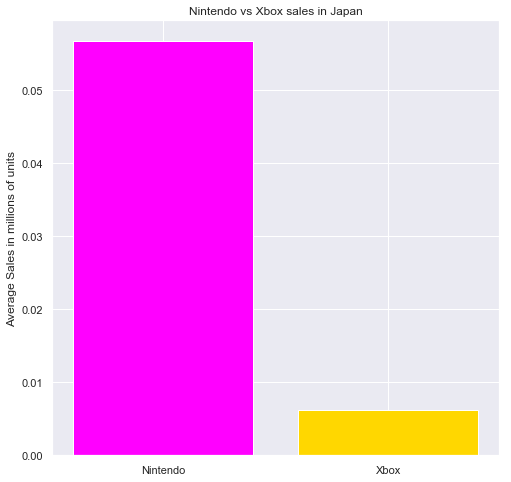

In [66]:
xbox = df['JP'][df['PlatformCategory'] == 4]
ps = df['JP'][df['PlatformCategory'] == 2]
x = ['Nintendo', 'Xbox']
y = [xbox.mean(), ps.mean()]

plt.figure(figsize=(8,8))
plt.bar(x, y, color = ('magenta', 'gold'))
plt.title('Nintendo vs Xbox sales in Japan')
plt.ylabel('Average Sales in millions of units')
plt.show()

# Conclusion to Question 1:   
In Japan Nintendo is more popular than Xbox, but it might be interesting to make further explorations.

# Question 2: Are shooter Games in USA sell better than sport games?

People like to think, that violent games cause aggressive behavior, however there are no studies linking violent video games to serious aggression. If the violent "games cause aggressive behavior" would be true, then in the country witn most of the mass shootings you would expect that shooter games will be on the top of the sales list. On the other hand, people like to think, that sport activities reduce stress and good for relieving aggressive behavior. We can't answer to this "Shooter games ==> violent behavior" question, but let's find out, if in USA shooter games are sell better than sport games.

For this question let's state:
- Our Hypothesis:
       h0 ==> no difference in sales revenue between shooter and sports games
       hA ==> there is a significant difference between shooter and sports games
- Set my significance level as 0.05
- I will use a Welch's T-test
- Determine the p-value
- Accept or reject the Null hypothesis

I decided to use Welch's T-test because I believe the number of shooter games might not be the same as the number of sports games, and when the sample sizes and sample variances between the two groups are NOT equal, the Welch's T-test gives more accurate p-value.

In [67]:
import library

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
shooter = df.loc[df['Genre']=='Shooter']['USA']
shooter = shooter.values
print(len(shooter))

sports = df.loc[df['Genre']=='Sports']['USA']
sports = sports.values
print(len(sports))

1296
2306


In [69]:
type(shooter)

numpy.ndarray

Note: I have 1296 Shooter games VS 2306 Sports games, so using Welch's T-test is the best option.

In [70]:
# calculate t-score and the degrees of freedom for the two samples
t = library.welch_t(shooter, sports)
df = library.welch_df(shooter, sports)
print(t,df)

4.003541069796452 2370.775843779252


In [71]:
# calculate p_value
library.p_value(shooter, sports)

3.2159536640041786e-05

I have a p-value (0.000032159536640041786) much lower than my alpha (0.05), so I'm able to reject the Null Hypothsesis, which stated that the shooter games and sports games sell in the same number.

In [72]:
# calculate Cohen's d
library.Cohen_d(shooter, sports)

0.1448893450288269

Interpretation of Cohen's d:  
Small effect = 0.2  
Medium Effect = 0.5  
Large Effect = 0.8  
We have obtained 0.1448893450288269, which is a really small value.

In [73]:
# calculate effect size
library.effect_size(shooter, sports)

0.1601909337423575

I have to run the data cleaning again.

In [74]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# prepare to plot missing values
df_missing = df.isna().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.sort_values(by='missing_count')

# create a df cleaned from columns containing more than 50% NaN values
df_missing = (df.isna().sum()/len(df)).reset_index()
df_missing.columns = ['column','proportion']
df_missing = df_missing.sort_values(by = 'proportion')

missingvaluescols = df_missing[df_missing['proportion'] > 0.40].column.tolist()
df_clean = df.drop(missingvaluescols, axis=1)

df = df.drop(columns=['Developer'])

# sorted(df.Year.unique())
# rename columns
# use integer for Year and Global sales columns
df = df.rename(columns={'Year_of_Release': 'Year', 'NA_Sales': 'USA', 'EU_Sales': 'EU', 'JP_Sales': 'JP', 'Other_Sales': 'Other', 'Global_Sales': 'Global'})
df = df[df['Year'].notnull()]
df = df[df['Genre'].notnull()]
df['Year'] = df['Year'].apply(int)
df['Global'] = df['Global'].apply(int)

df = df[df['Year'] <= 2016.0]
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN,NaN,NaN,NaN,NaN


# Let's plot the AVERAGE number of Shooter and Sports games sales

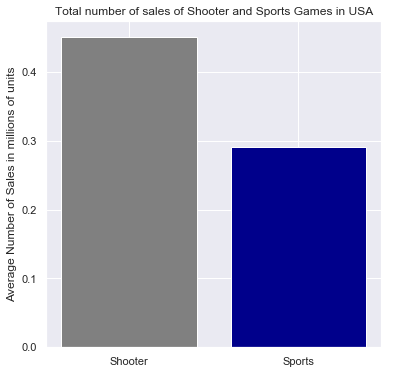

In [27]:
shooter = df['USA'][df['Genre'] == 'Shooter']
sports = df['USA'][df['Genre'] == 'Sports']
x = ['Shooter', 'Sports']
y = [shooter.mean(), sports.mean()]

plt.figure(figsize=(6,6))
plt.bar(x, y, color = ('grey', 'darkblue'))
plt.title('Total number of sales of Shooter and Sports Games in USA')
plt.ylabel('Average Number of Sales in millions of units')
plt.show()

We can see the AVERAGE number of sales / Shooter and Sports games, but what about the total number of sales?

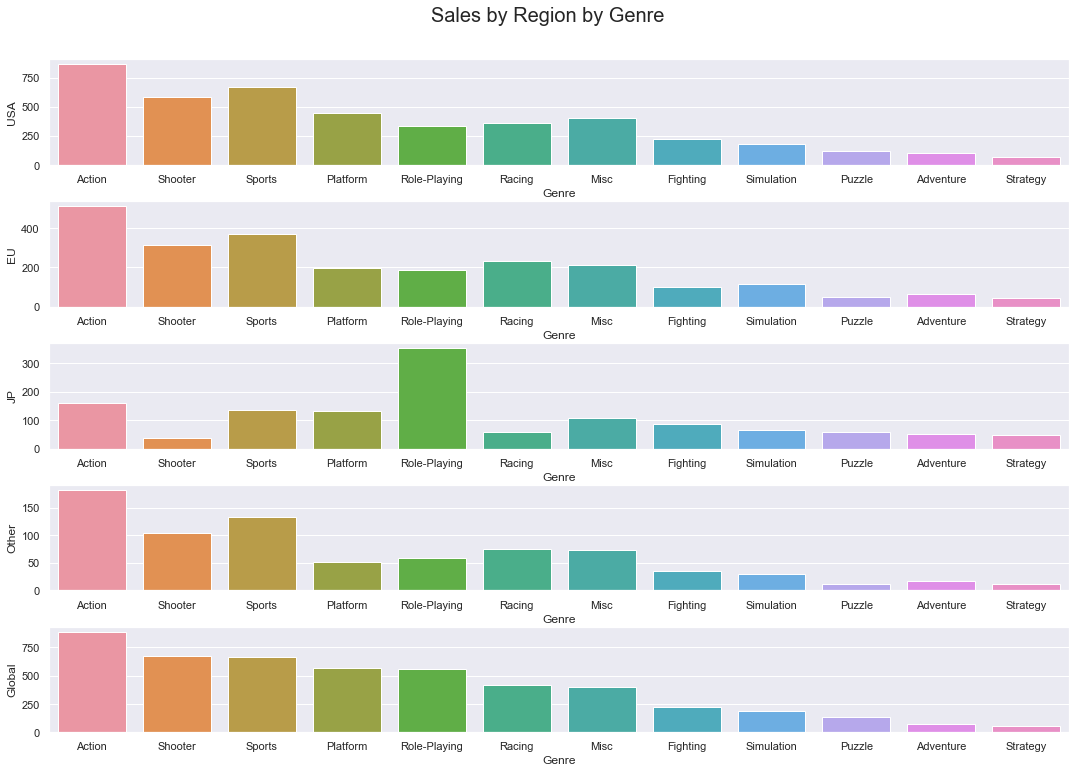

In [28]:
#sales by region by genre
dfplot = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global', ascending = False)
region = ['USA','EU','JP','Other','Global']

fig, axes = plt.subplots(nrows = len(region), ncols = 1, figsize = (15,10))
plt.tight_layout()
plt.suptitle('Sales by Region by Genre', fontsize = 20, y = 1.05)

for i, r in enumerate(region):
    sns.barplot(y = r , x = 'Genre' , data = dfplot,  orient='v' , ax= axes[i])
# dfplot.head()

# Conclusion to Question 2: 
As know from our low p-value, there is a significant difference in number of sales of Shooter and Sports games, and by the visualization we can see the difference in average number of sales. The average number of sales shows that Shooter games sell better, but in the big picture more Sports games(2306) were sold, than Shooter games(1296).

# Question 3: Do Users and Critics give equal scores?

For this question let's state:

Our Hypothesis:  
 h0 ==> Users and Critics scores are equal  
 hA ==> Users and Critics give different scores  
Set my significance level as 0.05  
I will use a Welch's T-test  
Determine my p-value  

For the beginning I'll create a new DataFrame clean of any NaN values, but keeping the Critic_Score, Critic_Count, User_Score and User_Count columns

In [29]:
# create df_3 (because it's for question number 3)
df_3 = df.dropna()
print(len(df))
print(len(df_3))

16444
6825


In [30]:
# check Datatypes
df_dtype = df_3.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype

,Count,Column Type
0,Name,object
1,Platform,object
2,Year,int64
3,Genre,object
4,Publisher,object
5,USA,float64
6,EU,float64
7,JP,float64
8,Other,float64
9,Global,int64


In [31]:
# create critics and users series for critic and user score
critics = df.Critic_Score.values
print(len(critics))

users = df.User_Score.values
type(len(users))

16444


int

In [32]:
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The User_Score column has tbd and NaN values, so we need to clean them away

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


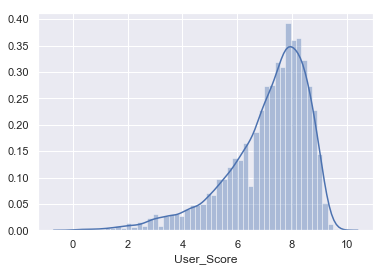

In [33]:
# get rid of the tbd and NaN values
# plot the distr
sns.distplot(df.loc[df.User_Score != 'tbd'].User_Score.dropna().astype('float32'))

In [34]:
df_3.User_Score = df_3.User_Score.astype(float)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


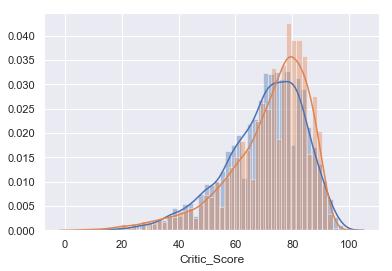

In [35]:
sns.distplot(df_3.Critic_Score);
sns.distplot(np.array(df_3.User_Score)/0.10);

In [36]:
# df_3 = df_3[df_3['Critic_Score']!='tbd']

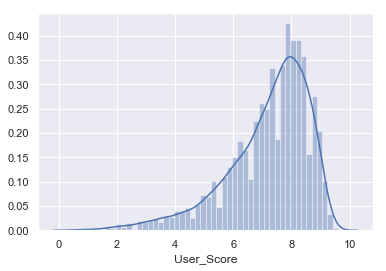

In [37]:
sns.distplot(df_3.User_Score);

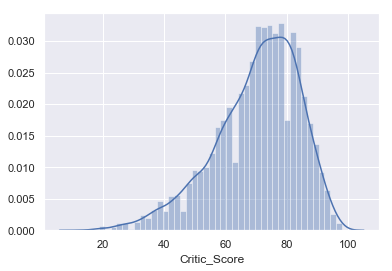

In [38]:
sns.distplot(df_3.Critic_Score);

In [39]:
# df.User_Score= (df.User_Score - df.User_Score.mean())/(df.User_Score.std())

In [40]:
critics = df_3.Critic_Score
print(len(critics))

users = df_3.User_Score
print(type(users))
print(len(users))

6825
<class 'pandas.core.series.Series'>
6825


In [41]:
# calculate t-score and the degrees of freedom for the two samples
t = library.welch_t(critics, users)
df = library.welch_df(critics, users)
print(t,df)

373.7897425760137 6971.11089178792


In [42]:
# calculate p_value
library.p_value(critics, users)

0.0

In [43]:
# calculate Cohen's d
library.Cohen_d(critics, users)

6.398689693134327

Let's try to take samples:

In [44]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    return sample
def get_sample_mean(sample):
    return sum(sample) / len(sample)
def create_sample_distribution(data, dist_size=100, n=50):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    return sample_dist
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [45]:
# check for normality - critics
critics_sample=create_sample_distribution(df_3.Critic_Score)
stats.normaltest(critics_sample)

NormaltestResult(statistic=2.866618227491763, pvalue=0.23851833059991373)

In [46]:
# check for normality - users
users_sample = create_sample_distribution(df_3.User_Score)
stats.normaltest(users_sample)

NormaltestResult(statistic=3.3003527974796336, pvalue=0.19201603424667774)

Visualy the distribution looks similar, ar at least doesn't show great difference, but to be scientific, we will find our p-value  
But first let's have a look at out standarized distribution

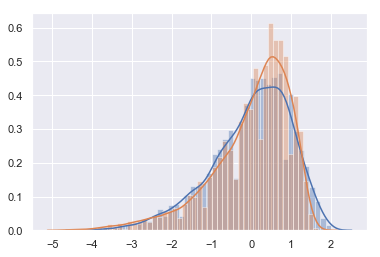

In [47]:
# Stardardizing and visualizing distributions
sns.distplot([(x - df_3.Critic_Score.mean())/df_3.Critic_Score.std() for x in df_3.Critic_Score]);
sns.distplot([(x - df_3.User_Score.mean())/df_3.User_Score.std() for x in df_3.User_Score]);

In [48]:
# find the p-value for our sample data
p_value = stats.ttest_ind(np.array(critics_sample)/100, np.array(users_sample)/10)
p_value

Ttest_indResult(statistic=-5.438556234758003, pvalue=1.5726194155670276e-07)

We have a low p-value ==> 0.000002923141954160524, which means we can reject our Null Hypothesis, which was stating that critics and users give similar scores.

In [49]:
critics_variance = sample_variance(critics_sample)
critics_mean = np.mean(np.array(critics_sample)/100)
print("critics sample mean is", critics_mean)
print("critics sample variance is", critics_variance)

critics sample mean is 0.7031919999999999
critics sample variance is 4.405001373737373


In [50]:
users_variance = sample_variance(users_sample)
users_mean = np.mean(np.array(users_sample)/10)
print("users sample mean is", users_mean)
print("users sample variance is", users_variance)

users sample mean is 0.7190040000000001
users sample variance is 0.040479109494949574


# Conclusion to Question 3:

I have a tried multiple T-tests on a sample data and on the whole data (population), and have received a p-value less than 0.05, so I can reject the Null Hypothesis. 